# Multivariate linear regression

- Hypothesis: 
 $
 \boxed{h_\theta(x) =  \theta^{\,\textsf T} x,}
 $
where $x = [x_0\,\, x_1\, \cdots \, x_n]^\textsf{T} = [1\,\, x_1\, \cdots \, x_n]^\textsf{T}\in \mathbb R^{n+1}$, and $\theta = [\theta_0\,\, \theta_1\, \cdots \, \theta_n]^\textsf{T} \in \mathbb R^{n+1}$, and $n$ is number of features.
- Cost function: $\boxed{J(\theta) = \tfrac1{2m}\displaystyle\sum_{i=1}^m [h_\theta(x_i) - y_i]^2}$, $m$ is number of training examples.
- Gradients: $\boxed{\nabla_\theta J(\theta) = \tfrac 1m \displaystyle\sum_i [h_\theta(x_i) - y_i] x_i}$.

## Example data


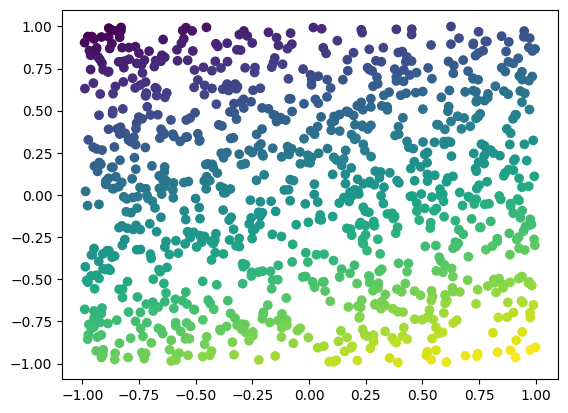

(array([[ 2.02512112],
        [ 1.00082623],
        [-2.99895387]]),
 0.00010520763802298758)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
b, a0, a1 = 2, 1, -3

np.random.seed(42)
x = np.zeros((samples, 2))
x = 2 * np.random.rand(samples, 2) - 1
eta = 0.05 * np.random.rand(samples, 1)[:, 0]
y = (b + a0 * x[:, 0] + a1 * x[:, 1] + eta).reshape(samples, 1)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

X = np.hstack((np.ones((samples, 1)), x))
theta = np.random.rand(3, 1)

h = lambda theta, x: np.matmul(x, theta)
def gradient_descent(theta, x, y, k=1000, alpha=0.1):
    gradJ = lambda theta: 1. / samples * ((h(theta, x) - y) * x).sum(axis=0).reshape(theta.shape)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta)
    return theta

cost_i = lambda theta, x, y: 0.5 / samples * (h(theta, x) - y)**2
cost = lambda theta, x, y: cost_i(theta, x, y).sum(axis=0)[0]

theta = gradient_descent(theta, X, y, k=1000, alpha=0.1)
theta, cost(theta, X, y)

## Combining new features

Using multivariate linear regressions allows for fitting more complicated models than "linear function", e.g. it can be used for polynomial model:

$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 \underbrace{\,x_1^2\,}_{x_2} + \theta_3 \underbrace{\,x_1^3\,}_{x_3}
$$

[[ 0.27053336]
 [ 0.17137151]
 [ 1.37096303]
 [-5.0538271 ]] 4671.985593038344


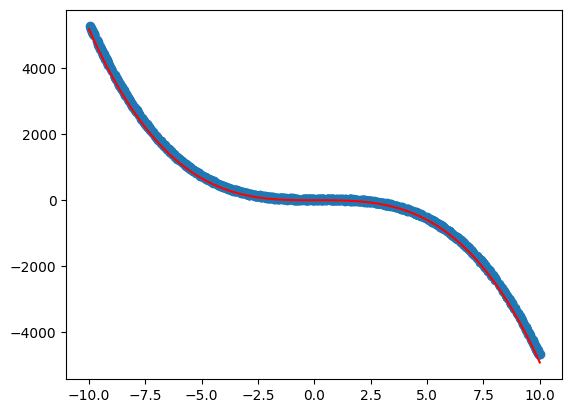

In [2]:
np.random.seed(42)

a, b, c, d = 2, -4, 3, -5

eta = 50 * np.random.rand(samples, 1)
x = 20 * np.random.rand(samples, 1) - 10
y = a + b * x ** 1 + c * x ** 2 + d * x**3 + eta

X = np.hstack((np.ones((samples, 1)), x, x**2, x**3))
theta = np.random.rand(4, 1)
theta = gradient_descent(theta, X, y, k=1000, alpha=1e-7)
print(theta, cost(theta, X, y))

linx = np.linspace(-10, 10, 100)
liny = theta[0] + theta[1] * linx ** 1 + theta[2] * linx ** 2 + theta[3] * linx ** 3
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(linx, liny, '-r')
plt.show()

## Feature scaling

In the previous example, we encounter the problem that the features' data magnitudes are very different, i.e. $\|x_1\| \le 10$, $\|x_2\| \le 100$, $\|x_3\| \le 1000$.
This can be a problem for an algorithm like gradient descent. This is due to their contribution to gradient calculation (marked with red in the following equation):

$$
\nabla_\theta J(\theta) = \tfrac 1m \displaystyle\sum_i [h_\theta(x_i) - y_i]\,\, \color{red}{x_i}
$$

As the result in the previous example, one has to set $\alpha = 10^{-7}$ extreme value, almost reaching the 32-bit float precision. It should be pointed out that in the previous examples, the tails ($\|x\| \sim 10$) are not fitted very well, and it is probably very hard to obtain better results without data preprocessing before the optimization procedure.

To resolve this issue, one could use feature scaling. Feature scaling is to normalize the data. In the following example, we use one of the most popular scaling to range $[-1, 1]$ with the transformation:

$$
    x' \to r^{-1}(x - \bar x)
$$

where $r = \tfrac12(\max x - \min x)$, and $\bar x = \tfrac12(\min x + \max x)$. If it is neccessary the data can be transform to original "base", using

$$
    x \to r x' + \bar x
$$

[[   26.96022874]
 [  -37.50486458]
 [  256.91114067]
 [-4943.41456585]] 106.3578870769015


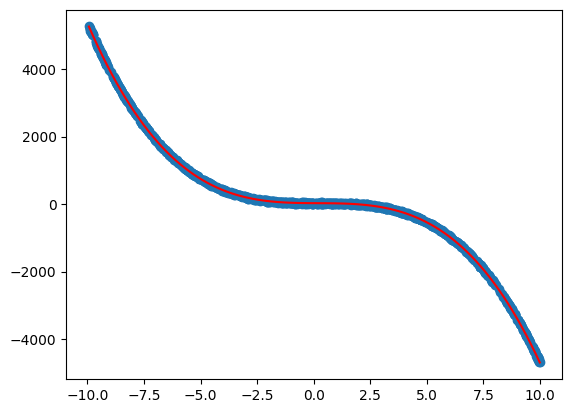

In [3]:
xmin = x.min()
xmax = x.max()
a0 = 0.5 * (xmin + xmax)
r = 0.5 * (xmax - xmin)
x0 = (x - a0) / r

X = np.hstack((np.ones((samples, 1)), x0, x0**2, x0**3))
theta = np.random.rand(4, 1)
theta = gradient_descent(theta, X, y, k=1000, alpha=1)
print(theta, cost(theta, X, y))

linx = np.linspace(-1, 1, 100)
liny = theta[0] + theta[1] * linx ** 1 + theta[2] * linx ** 2 + theta[3] * linx ** 3
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(r * linx + a0, liny, '-r')
plt.show()

## Normal equation

Similar to [univariate linear regression](./01-univariate-linear-regression.ipynb), there is an exact solution for multivariate linear regression.
It can be shown that the solution is given by

$$
\boxed{\theta = (X^\mathsf{T} X)^{-1} X^{\mathsf T} y,}
$$

where $X = \left[\,\begin{matrix} 1 & \vec x_1 \\ 1 & \vec x_2 \\ \vdots & \vdots \\[1ex] 1 & \vec x_m \end{matrix}\,\right]$.

In [4]:
samples = 1000
b, a0, a1 = 2, 1, -3

np.random.seed(42)
x = np.zeros((samples, 2))
x = 2 * np.random.rand(samples, 2) - 1
eta = 0.05 * np.random.rand(samples, 1)[:, 0]
y = (b + a0 * x[:, 0] + a1 * x[:, 1] + eta).reshape(samples, 1)

X = np.hstack((np.ones((samples, 1)), x))
theta = np.matmul(np.linalg.pinv(np.matmul(X.T, X)), np.matmul(X.T, y))

theta, cost(theta, X, y)

(array([[ 2.02512112],
        [ 1.00082623],
        [-2.99895387]]),
 0.00010520763802298743)

## Gradient descent vs normal equation

| Gradient descent | Normal equation |
| :--- | :--- |
| $\color{red}{\text{-- need to choose } \alpha}$ | $\color{green}{\text{+ no need for }\alpha}$ |
| $\color{red}{\text{-- many iterations}}$ | $\color{green}{\text{+ no need for iterate}}$ |
| $\color{green}{\text{+ works well for } n \gg 1}$ | $\color{red}{\text{-- slow for } n \gg 1, (X^{\mathsf T} X)^{-1} \sim \mathcal O(n^3)}$ |